
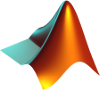
# **MatrixLaboratory $\Rightarrow$ Matlab**
is an interpreted programming language. Originally developed for linear algebra and engineering problems, but now with wide applicability and toolboxes for areas ranging from medicine, economics, and machine learning.

A good way to introduce yourself to a new language is by trying to solve a "non-trivial" problem; learning the tools and syntax necessary to solve the problem along the way. This motivates the syntax/tools in a "why" versus "what" way!

It is good for being "expressive", allowing you to use only a few lines of code to implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conways_Game_of_Life):

In [1]:
format compact

In [2]:
%plot native
S=zeros(100); S(54:56,81:87)=[0,1,0,0,0,0,0;0,0,0,1,0,0,0;1,1,0,0,1,1,1;];
A= single(toeplitz([[1 1] zeros(1,100-2)])); pause(5)
for it=1:500
    S= min(1,max(0,S+ 1-mod(A*S*A +4,7)));    %Magic
    imagesc(S); axis square; axis off; drawnow;
end

# Motivation: An Exploration of an Interesting Dataset


<img src="life.PNG" width="800">


**Github repository of data we will use**

https://github.com/bu-rcs/bu-rcs.github.io/tree/main/Bootcamp/Data

**Citation**

University of Wisconsin Population Health Institute. County Health Rankings & Roadmaps 2019.www.countyhealthrankings.org.

**Data Source**

https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

# **Let's solve an example problem:**

[ProjectEuler](https://projecteuler.net/) is a good source of "starter" problems.

[Problem 1](https://projecteuler.net/problem=1):

_"If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23._

_Find the sum of all the multiples of 3 or 5 below 1000."_

Pseudo-code:

```
1 "total" starts at 0
2 Loop over all the numbers 1 to 999
3     Is the number a multiple of 3 or 5?
4         If yes, add to our cumulative sum "total"
5 Try the next number
```

Line 1: We need to be able to store "variables". It can also be useful to display variables/info:

In [104]:
% We sometimes want to leave helpful comments/explanations right in the
% code. This is a comment because it starts with: %

% A function optionally takes some input(s) and optionally has some output(s)
% it usually looks like:
% output = myfunctions(input)
disp("We can display things using this function.")

% ===== Let's play with variables to figure out line 1 =======
total = 0
total = 1
disp(total)
%Here we are using the equals sign "=" to indicate variable assignment

We can display things using this function.
total =
     0
total =
     1
     1


In [105]:
% Appending a semicolon to the end of a line suppresses output
total = 6;
disp(total)

     6


In [112]:
% This adds 2 to the current value of the variable "total", and saves the sum
% back in total
total = total + 2

% We can also save things other than numbers to a variable.
% Like a "string" of characters:
my_secret_password = "joshiscool"

% Or even a range of numbers: using the first number, a colon, and the last number:
mycollection = 1:2:10

% That is called a "vector", you could also call it an "array"
% It has a "size" that depends on it's shape and how big it is along each
% of its dimensions
my_size = size(mycollection)

total =
    20
my_secret_password = 
    "joshiscool"
mycollection =
     1     3     5     7     9
my_size =
     1     5


In [116]:
mycollection(1)

ans =
     1


Line 2: We'd like to do the same action over and over, but on varying inputs. This is called a loop; there are several kinds including a "for" loop. We do the actions inside the loop "for" each value that the loop variable takes on
```
1 "total" starts at 0
2 Loop over all the numbers 1 to 999
3     Is the number a multiple of 3 or 5?
4         If yes, add to our cumulative sum "total"
5 Try the next number
```

In [131]:
% ======================= Now for line 2 =====================

start_num = 1;
end_num = 10;
interval = -1;

for loop_variable = 10 : -1 : 1
    loop_variable
end % Matlab knows where the loop ends because we "end" the loop.

loop_variable =
    10
loop_variable =
     9
loop_variable =
     8
loop_variable =
     7
loop_variable =
     6
loop_variable =
     5
loop_variable =
     4
loop_variable =
     3
loop_variable =
     2
loop_variable =
     1


We can see how we'd use this to solve the problem: we'll loop over all the numbers 1 to 999. Within the loop we'll test to see if they are a multiple of 3 or 5 and if so add it to our "total" variable.

Line 3: How do we test if a number is a multiple? How do we take an action depending on some question (in this case if it is a multiple). Let's answer the second question first:
```
1 "total" starts at 0
2 Loop over all the numbers 1 to 999
3     Is the number a multiple of 3 or 5?
4         If yes, add to our cumulative sum "total"
5 Try the next number
```

In [134]:
% ======================= Now for line 3 =====================

% Matlab represents "true" as 1 and "false" as 0
obvious_fact = 10 > 1
obviously_wrong = 999 < 2
a = 10+1;
b = 12;
also_true = a==b
% Here "=="re checking for equality, *not* doing variable assignment

% We can take conditional actions using an "if" statement
if a==b
    disp("I assure you a equals b")
elseif a>b
    disp("a is greater than b")
else
    disp("Sadly a doesn't equal b")
end % Just like a "for" loop, we need to "end" an if statement
% We can also combine logical statements
both_arent_true = obviously_wrong & obvious_fact            % "and" statement
but_at_least_one_is_true = obviously_wrong | obvious_fact   % "or" statement

obvious_fact =
  logical
   1
obviously_wrong =
  logical
   0
also_true =
  logical
   0
Sadly a doesn't equal b
both_arent_true =
  logical
   0
but_at_least_one_is_true =
  logical
   1


You need to be careful when using floating point numbers and testing for equality:

In [138]:
format short
c = 0.15 + 0.15
d = 0.10 + 0.20

c =
    0.3000
d =
    0.3000


In [141]:
format long %See all decimal digits

a = 2+2;
b = 1+3;
if a==b
    disp("a equals b") %What do you expect here?
else
    disp("a doesn't equal b")
end

c = 0.15 + 0.15;
d = 0.10 + 0.20;
if c==d
    disp("c equals d") %What do you expect here?
else
    disp("c doesn't equal d")
end

c
d
f=2/3
d-c

a equals b
c doesn't equal d
c =
   0.300000000000000
d =
   0.300000000000000
f =
   0.666666666666667
ans =
     5.551115123125783e-17


In [143]:
c_minus_d = abs(c-d)

absolute_FP_error = eps(c)

if abs(c-d)<=1.5*eps(d)
    disp("c equals d, within floating point tolerance")
else
    disp("c doesn't equal d, within floating point tolerance")
end

format short %Hide some precision

c_minus_d =
   5.5511e-17
absolute_FP_error =
   5.5511e-17
c equals d, within floating point tolerance


In [ ]:
bank_account =1.37
bank_account = bank_account + 10.00
bank_account = bank_account - 11.37
if bank_account == 0
    disp("Ooops")
else
    disp("Buy even more stuff!")
end

Floating point numbers have limited precision:
https://en.wikipedia.org/wiki/Floating-point_arithmetic#Internal_representation

There are many pitfalls to working with floating point numbers:
https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

```
1 "total" starts at 0
2 Loop over all the numbers 1 to 999
3     Is the number a multiple of 3 or 5?
4         If yes, add to our cumulative sum "total"
5 Try the next number
```
So that answers the second question, but how do we test if something is a multiple? This is more a logic/math question than exclusively programming, but any non-trivial program will need you to figure things like this out. A number is a multiple of 3 if it is evenly divided by 3:
* 3 evenly divides into 12, so 12 is a a multiple of 3
* 3 doesn't evenly divide 13, so 13 isn't a multiple

So our problem is now to test for divisibility. Let's cook up a couple ways:

In [144]:
quotient = 13/3

quotient =
    4.3333


In [149]:
dummy=1;
% Test for divisibility
% Way 1
quotient = 13/3

% Way 1: Is the quotient the same rounded or not?
rounded = round(quotient,0)
% We can round to the nearest whole number
is_multiple = rounded==quotient

quotient = 12/3
rounded = round(quotient)
is_multiple = rounded==quotient

quotient =
    4.3333
rounded =
     4
is_multiple =
  logical
   0
quotient =
     4
rounded =
     4
is_multiple =
  logical
   1


In [155]:
% Can you think of a different way?
% A number is a multiple if there is no remainder after division
rem(13,3)
rem(12,3)
% Matlab treats non-zero numbers as true, and numerical zero as false
a = 0;
if a
    disp("a is considered true")
else
    disp("a is considered false")
end

ans =
     1
ans =
     0
a is considered false


In [166]:
total =0;
for loop_variable = 1:999
    ismultiple3 = ~rem(loop_variable,3);
    ismultiple5 = ~rem(loop_variable,5);
    if ismultiple3 | ismultiple5
        total = total + loop_variable;
    else % Is there a situation where it would be and we need to take action?
    end
end
total

total =
      233168


Let's apply these ideas to test if a number is divisible by 3 or 5.

In [ ]:
n=7;
divisible3 = ~rem(n,3);
divisible5 = ~rem(n,5);

if divisible3 | divisible5
    disp("Divisible by 3 or 5")
elseif divisible3 & ~divisible5
    disp("Divisible by only 3")
elseif ~divisible3 & divisible5
    disp("Divisible by only 5")
else 
    disp("Not divisible by 3 or 5")
end

# **Putting it all together to solve Problem 1**

In [ ]:
%Total starts at 0
total=0
%Loop over all the numbers 1 to 999
for i = 1:999
    %Is the number a multiple of 3 or 5?
    divisibleBy3 = ~rem(i,3);
    divisibleBy5 = ~rem(i,5);
    if divisibleBy3 | divisibleBy5
        %If yes, add to our cumulative sum
        total = total + i;
    end
%Try the next number
end
total

In [ ]:
%Total starts at 0
total = 0;
%Loop over all the numbers 1 to 999
for n = 1:999
    %Is the number a multiple of 3 or 5?
    if round(n/3)==(n/3) | round(n/5)==(n/5)
        %If yes, add to our cumulative sum
        total = total + n;
    end
%Try the next number
end
disp(total)

What about the other loop construct?


In [181]:
age = 0;
adult = 18;
sick = 0;
disp("Am I an adult?")
rng(39)
while ~sick
    age = age + 1;
    sick = rand(1)>0.9;
    if age>=adult
        break
    end
    disp(num2str(age)+" years old, not yet!")
end
disp(num2str(age)+" years old, finally an adult or I need to go to the doctor.")

Am I an adult?
1 years old, not yet!
2 years old, not yet!
3 years old, not yet!
4 years old, not yet!
5 years old, not yet!
6 years old, not yet!
7 years old, not yet!
8 years old, not yet!
9 years old, not yet!
10 years old, not yet!
10 years old, finally an adult or I need to go to the doctor.


We can also re-use this simple while loop to show a couple other ideas: random numbers, non-deterministic program behavior, and ```break```ing out of loops

# **Vectors/Matrices and Vectorization**

Is there a "faster" way to solve our Project Euler problem? We could vectorize.

Vector operations perform the same operation on multiple pieces of data. Consider a vector of the numbers 1 through 10. Recall we can make a vector like this easily:

In [183]:
v = 1:10

v =
     1     2     3     4     5     6     7     8     9    10


If we want to find the sum of each of these numbers, plus 3, squared we could do:

In [184]:
total = 0;
for i=v
    operation = (i+3)^2;
    total = total + operation;
end
total

total =
   805


We can actually do this all in one set of operations:

In [193]:
u = 11:20

u =
    11    12    13    14    15    16    17    18    19    20


In [185]:
v

v =
     1     2     3     4     5     6     7     8     9    10


In [189]:
size(v)

ans =
     1    10


In [186]:
v+3

ans =
     4     5     6     7     8     9    10    11    12    13


In [197]:
(v+3).^2

ans =
    16    25    36    49    64    81   100   121   144   169


In [198]:
sum((v+3).^2)

ans =
   805


Notice that we need to put a "." before the exponentiation. This is because MATLAB treats matrix algebra as the expected operation. The dot tells it to perform the "scalar" version of the operation, going one-by-one through each element. See the difference here:

In [ ]:
v^2

In [ ]:
v.^2

Be careful as accidentally doing the wrong scalar/vector operation deosn't always result in an error message, some operations will work both ways.

In [ ]:
v = 1:10
u = [1:10]' %The single qoute mark gives the "transpose" of the matrix, making columns into rows and vice versa

In [ ]:
vector = v*u %This is actually an inner product
scalar = v.*u %This is effectively an outer product

So we can use this idea to make a more compact (and faster) way to do this: 

In [199]:
n = 1:999;

In [200]:
sum(n(~rem(n,3) | ~rem(n,5)))

ans =
      233168


# **Functions**

We can encapsulate a potentially complex idea/code inside of a convenient package. Image we have devised a way of computing if a number is a multiple of another:

In [202]:
round(11/3)

ans =
     4


In [ ]:
a=6

In [ ]:
4<3

In [203]:
round(9437598/145)==(9437598/145)

ans =
  logical
   0


We can also see if it's a multiple of several numbers:

In [204]:
round(117/3)==(117/3) | round(117/5)==(117/5)

ans =
  logical
   1


But this starts to get silly:

In [ ]:
round(4561/3)==(4561/3) | round(4561/5)==(4564/5) | round(4561/7)==(4561/7) | round(4561/11)==(4561/11) | round(117/13)==(117/13)| round(117/15)==(117/15)

Generally copying-pasting the same code over and over is bad. It is harder to read, but even worse also changing the copy-paste in one area doesn't update everywhere else. We can encapsulate our code to test for divisibility into our own function:

In [205]:
%%file is_mult.m

function res = is_mult(test,divisor)
    res = round(test/divisor)==(test/divisor);
end

Created file '/projectnb2/scv/jbevan/tutorials/bootcamp/is_mult.m'.


MATLAB requires functions to be defined in a separate file with the filename the same as the function name, though the "parent" function can also contain other function definitions. For simple functions it is possible to define them inline; these are called "anonymous" functions. You can define them this way:

In [206]:
is_mult_anon = @(n,divisor) round(n/divisor)==(n/divisor);

In [208]:
is_mult_anon(992,3)

ans =
  logical
   0


You can encapsulate very complex programs/algorithms and treat them as a black box:

In [209]:
write_paper_that_gets_into_nature('Josh Bevan')

Error using eval
Unrecognized function or variable 'write_paper_that_gets_into_nature'.


## String Manipulation
Matlab can do all sorts of string manipulation. This can be useful for all sorts of tasks. Imagince we have some DNA sequencing data (base pairs) that we want to do some processing on:

In [ ]:
bp = ['atcg']

In [ ]:
rng(43) %Set random number generator to be reproducible
my_rand = randi(4,1,10)

In [ ]:
bp(my_rand)

In [ ]:
bp(randi(4,1,10))

# Data Types

Primitives: Integers/Floating Point/Characters/Strings/Booleans/etc.

In [ ]:
a=uint8(2)
b=uint8(30)

In [ ]:
a-b

In [ ]:
bp_char='atcg';
bp_string="atcg";
class(bp_char)
class(bp_string)

In [ ]:
format long
a = double(2/3)
b = single(2/3)
eps(a)
eps(b)
format short

**Sructs:**

In [ ]:
for i=1:10
    patient(i).dna = bp_char(randi(4,1,20));
end
patient(2).dna

In [ ]:
class(patient)

**Maps:**

In [ ]:
mymap = containers.Map(["smallest prime","dull number","days in year"],[2,1729,365])

In [ ]:
mymap = containers.Map(["smallest prime","dull number","days in year"],[2,1729,365])

In [ ]:
mymap("days in year")

And others... cell arrays, dates, categorical, and **tables** (which we will look at in closer detail next time)